In [1]:
]activate ..

 Activating environment at `~/Thesis/code/Nas.jl/experiments/Project.toml`


In [2]:
using Plots
using JLD2
using FileIO
using Flux.Data.MNIST
using MLDataUtils

## Sine regression

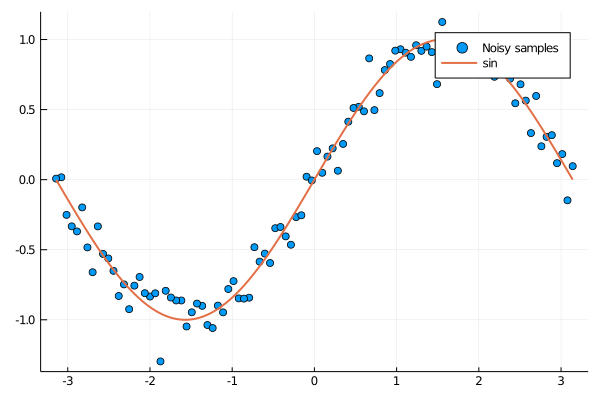

In [3]:
@load "../data/synthetic/sine.jld2" x y train_idx test_idx
x_ = range(-pi, pi, length=300);
y_ = sin.(x_);
scatter(x, y, label="Noisy samples")
plot!(x_, y_, label="sin", lw = 2)

In [5]:
train_idx, test_idx

(1:70, 71:100)

## Freidman 1 regression problem

The regression problem Friedman 1 as described in Friedman (1991) and Breiman (1996). Inputs are 10 independent variables uniformly distributed on the interval \[0,1\], only 5 out of these 10 are actually used. Outputs are created according to the formula

$$y = 10 sin(\pi x_1 x_2) + 20 (x_3 - 0.5)^2 + 10 x_4 + 5 x_5 + \epsilon \quad \epsilon \sim N(0, \sigma)$$


Breiman, Leo (1996) Bagging predictors. Machine Learning 24, pages 123-140.  
Friedman, Jerome H. (1991) Multivariate adaptive regression splines. The Annals of Statistics 19 (1), pages 1-67.

In [4]:
nobs = 500;
scale = 0.1;
x = randn(10, nobs);
y = 10 .* sin.(pi .* x[1, :] .* x[2, :]) .+ 20 .* (x[3, :] .- 0.5).^2 .+ 10 .* x[4, :] .+ 5 .* x[5, :] .+ scale.*randn(nobs);

## Circles

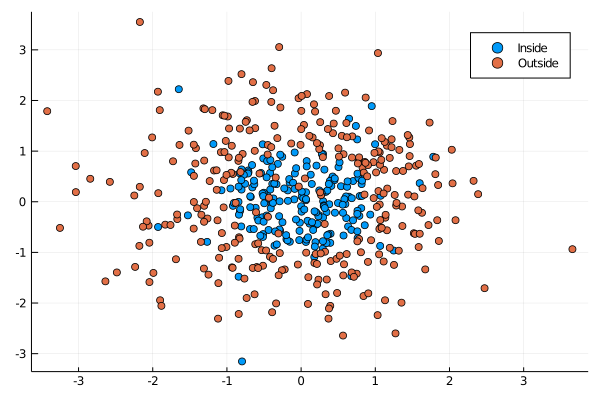

In [8]:
@load "../data/synthetic/circles.jld2" x y train_idx test_idx
scatter(x[1, y], x[2, y], label="Inside")
scatter!(x[1, .!y], x[2, .!y], label="Outside")

## Sum of digits (text)

In [9]:
@load "../data/synthetic/digits_text_mill.jld2" train_features train_bagids test_features test_bagids

4-element Array{Symbol,1}:
 :train_features
 :train_bagids
 :test_features
 :test_bagids

In [11]:
features, bagids = train_features, train_bagids
for i = 1:5
    s = features[bagids .== i]
    println(string("{", join(s, ", "), "}", " = ", sum(s)))
end

{0, 3, 3, 5, 5, 5, 5, 6, 7, 9} = 48
{8, 8, 8} = 24
{1, 2, 2, 3, 4, 5, 7, 8, 8, 8} = 48
{0, 0, 4, 6, 8} = 18
{2, 3, 3, 4, 4, 4, 5, 6, 7, 8} = 46


## Sum of digits (MNIST)

In [12]:
@load "../data/synthetic/digits_mnist_mill.jld2" feature_idx_train bagids_train labels_train feature_idx_test bagids_test labels_test

6-element Array{Symbol,1}:
 :feature_idx_train
 :bagids_train
 :labels_train
 :feature_idx_test
 :bagids_test
 :labels_test

In [13]:
X = MNIST.images();
y = MNIST.labels();

In [30]:
feature_idx_train[bagids_train .== 12]

3-element Array{Int64,1}:
 40091
 41011
 12141

In [34]:
X[feature_idx_train[bagids_train .== 12][1]]

In [35]:
X[feature_idx_train[bagids_train .== 12][2]]

In [36]:
X[feature_idx_train[bagids_train .== 12][3]]

In [37]:
labels_train[12]

5